# Todo

* determine scale factor of standard atmosphere to get 1cm of precipitable water. This is necessary because lblrtm is assuming the pwt for the path not the vertical column
    * create an od spectrum with pm, slant angle = 0 and pwt = 1cm
    * create an od spectrum for scale fuactor of 1
    * take the ratio. The resulting scale fuctor is what is needed to get from to 1pwt, use this for future scaling!!!

* generate and run lnfl

# PWT at angle=0 and pwt=1

## develop

In [331]:
import tapefive.lab as tf

In [516]:
reload(tf)
reload(tf.tape5parser)
reload(tf.tools)


<module 'tapefive.tools' from '/home/hagen/prog/tapefive/tapefive/tools.py'>

In [517]:
self = tf.Lblrtm(verbose=True)

self.configuration.spectral_grid.fmax = tf.tools.nm_to_inv_cm(910)
self.configuration.spectral_grid.fmin = tf.tools.nm_to_inv_cm(970)
self.configuration.rayleigh.enabled = False

In [518]:
self.configuration.molecular_spectral_lines.molecules.H2O.enable = True
self.configuration.molecular_spectral_lines.molecules.H2O.enable_continuum = True
self.configuration.molecular_spectral_lines.molecules.H2O.scale = 1
self.configuration.molecular_spectral_lines.molecules.H2O.scale_unit = 'pwv'

In [441]:
res = self.run()

Creating LBLRTM filesystem at /home/hagen/tmp/tapefive_lblrtm
Writing TAPE5 file
Executing LBLRTM
STOP  LBLRTM EXIT 

LBLRTM run completed successfully


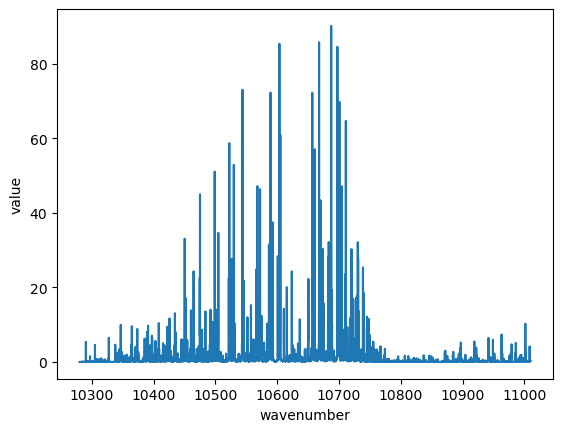

In [442]:
res.data.value.plot()

In [323]:
txt =  """1:   H2O  2:  CO2   3:    O3  4:   N2O  5:    CO  6:   CH4  7:     O2 8:    NO  

                           9:   SO2 10:   NO2 11:   NH3 12:  HNO3 13:    OH 14:    HF 15:   HCL 16:   HBR 

                          17:    HI 18:   CLO 19:   OCS 20:  H2CO 21:  HOCL 22:    N2 23:   HCN 24: CH3CL

                          25:  H2O2 26:  C2H2 27:  C2H6 28:   PH3 29:  COF2 30:   SF6 31:   H2S 32: HCOOH

                          33:   HO2 34:     O 35:CLONO2 36:   NO+ 37:  HOBR 38:  C2H4 39: CH3OH"""

In [327]:
mls = [m for m in txt.split() if ":" not in m]

In [330]:
"', '".join(mls)

"H2O', 'CO2', 'O3', 'N2O', 'CO', 'CH4', 'O2', 'NO', 'SO2', 'NO2', 'NH3', 'HNO3', 'OH', 'HF', 'HCL', 'HBR', 'HI', 'CLO', 'OCS', 'H2CO', 'HOCL', 'N2', 'HCN', 'CH3CL', 'H2O2', 'C2H2', 'C2H6', 'PH3', 'COF2', 'SF6', 'H2S', 'HCOOH', 'HO2', 'O', 'NO+', 'HOBR', 'C2H4', 'CH3OH"

In [ ]:
'H2O', 'CO2', 'O3', 'N2O', 'CO', 'CH4', 'O2', 'NO', 'SO2', 'NO2', 'NH3', 'HNO3', 'OH', 'HF', 'HCL', 'HBR', 'HI', 'CLO', 'OCS', 'H2CO', 'HOCL', 'N2', 'HCN', 'CH3CL', 'H2O2', 'C2H2', 'C2H6', 'PH3', 'COF2', 'SF6', 'H2S', 'HCOOH', 'HO2', 'O', 'NO+', 'HOBR', 'C2H4', 'CH3OH'

# lets do it

In [613]:
reload(tf)
reload(tf.tape5parser)
reload(tf.tools)
reload(tf.fileio)


<module 'tapefive.fileio' from '/home/hagen/prog/tapefive/tapefive/fileio.py'>

In [632]:
run = tf.Lblrtm(verbose=True)
pwv = 1
run.configuration.spectral_grid.fmax = tf.tools.nm_to_inv_cm(910)
run.configuration.spectral_grid.fmin = tf.tools.nm_to_inv_cm(970)
run.configuration.spectral_grid.layering_control = 'exact'
run.configuration.spectral_grid.df = 0.005
run.configuration.rayleigh.enabled = False
run.configuration.molecular_spectral_lines.molecules.H2O.enable = True
run.configuration.molecular_spectral_lines.molecules.H2O.enable_continuum = True
run.configuration.molecular_spectral_lines.molecules.H2O.scale = pwv
run.configuration.molecular_spectral_lines.molecules.H2O.scale_unit = 'pwv'
run_pwd = run
res_pwd = run.run()

Creating LBLRTM filesystem at /home/hagen/tmp/tapefive_lblrtm
Removing old result file /home/hagen/tmp/tapefive_lblrtm/run/lblrtm/TAPE10
Removing old result file /home/hagen/tmp/tapefive_lblrtm/run/lblrtm/TAPE11
Removing old result file /home/hagen/tmp/tapefive_lblrtm/run/lblrtm/TAPE12
Writing TAPE5 file
Executing LBLRTM
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
STOP  LBLRTM EXIT 

LBLRTM run failed, i think


In [633]:
run = tf.Lblrtm(verbose=True)
pwv1norm = 0.3458833686192847
run.configuration.spectral_grid.fmax = tf.tools.nm_to_inv_cm(910)
run.configuration.spectral_grid.fmin = tf.tools.nm_to_inv_cm(970)
run.configuration.spectral_grid.layering_control = 'exact'
run.configuration.spectral_grid.df = 0.005
run.configuration.rayleigh.enabled = False
run.configuration.molecular_spectral_lines.molecules.H2O.enable = True
run.configuration.molecular_spectral_lines.molecules.H2O.enable_continuum = True
run.configuration.molecular_spectral_lines.molecules.H2O.scale = pwv1norm * pwv # 
run.configuration.molecular_spectral_lines.molecules.H2O.scale_unit = 'direct'
run_dir = run
res_dir = run.run()

Creating LBLRTM filesystem at /home/hagen/tmp/tapefive_lblrtm
Removing old result file /home/hagen/tmp/tapefive_lblrtm/run/lblrtm/TAPE10
Removing old result file /home/hagen/tmp/tapefive_lblrtm/run/lblrtm/TAPE11
Removing old result file /home/hagen/tmp/tapefive_lblrtm/run/lblrtm/TAPE12
Writing TAPE5 file
Executing LBLRTM
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
STOP  LBLRTM EXIT 

LBLRTM run failed, i think
